# Applied Machine Learning - Homework Assignment


## Instructions
- Please complete all tasks including coding implementations and theoretical explanations.
- Submit the completed notebook as a `.ipynb` file.
- Ensure that all code runs correctly.
- Replace the placeholder comments with your own implementation.

# Detailed Rubric 

This rubric outlines the criteria for evaluating the Assignment. Each section is assigned a score, with a total of 70 points.

---

## 1. PyTorch Basics (10 Points)
| Criteria | Points | Description |
|----------|--------|-------------|
| Tensor Creation and Operations | 5 | Correctly implements tensor creation, transposition, mean, cumulative sum, and concatenation. |
| Device Management (CPU/GPU) | 5 | Moves tensor to GPU if available and verifies the device assignment. |

---

## 2. Implementing a Feedforward Neural Network (15 Points)
| Criteria | Points | Description |
|----------|--------|-------------|
| Model Definition | 5 | Defines the neural network structure correctly with fully connected layers. |
| Activation Functions | 5 | Uses appropriate activation functions (Sigmoid, Softmax). |
| Correct Forward Pass | 5 | Implements the forward function correctly, including reshaping input data. |

---


## 3. Gradient Descent and Optimization (15 Points)
| Criteria | Points | Description |
|----------|--------|-------------|
| Manual Gradient Descent Implementation | 10 | Implements manual gradient descent for optimizing a simple function. Correctly calculates gradients and updates parameters. |
| Gradient Resetting | 5 | Ensures proper resetting of gradients after each update step. |

---

## 4. Activation Function Visualization (10 Points)
| Criteria | Points | Description |
|----------|--------|-------------|
| Plotting Activation Functions | 5 | Correctly plots Sigmoid, Tanh, and ReLU activation functions. |
| Functionality & Code Clarity | 5 | Uses correct formulas and appropriate range of input values for visualization. |

---

## 5. Dropout Regularization (10 Points)
| Criteria | Points | Description |
|----------|--------|-------------|
| Implementation of Dropout Layers | 5 | Correctly integrates `nn.Dropout()` layers into the neural network. |
| Forward Pass with Dropout | 5 | Ensures dropout is applied only during training, and scales weights appropriately during inference. |

---

## 6. Momentum-based Gradient Descent (10 Points)
| Criteria | Points | Description |
|----------|--------|-------------|
| Momentum Optimization Implementation | 5 | Correctly implements momentum-based gradient descent. |
| Velocity Update & Weight Adjustment | 5 | Uses the correct momentum update formula and properly updates parameters. |

---


## Section 1: PyTorch Basics


### Q1: Tensor Operations
In this section, you will create and manipulate PyTorch tensors, including operations such as transposing, computing means, cumulative sums, and concatenations.


In [9]:

import torch

#========== YOUR CODE STARTS HERE ==========

# Create a 3x3 random tensor

tensor = torch.rand((3, 3))
print("Original Tensor:\n", tensor)

# Transpose the tensor

tensor_transposed = tensor.t()
print("Transposed Tensor:\n", tensor_transposed)

# Compute mean and cumulative sum

mean_val = torch.mean(tensor)
cumulative_sum = torch.cumsum(tensor, dim = 1)
print("Mean:", mean_val)
print("Cumulative Sum:\n", cumulative_sum)

# Concatenate two tensors

tensor2 = torch.rand((3, 3))
concatenated = torch.cat((tensor, tensor2), dim = 0)
print("Concatenated Tensor:\n", concatenated)

# Move tensor to GPU if available

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = tensor.to(device)
print("Tensor on Device:", tensor.device)

#========== YOUR CODE ENDS HERE ===========


Original Tensor:
 tensor([[0.3426, 0.9462, 0.4191],
        [0.8016, 0.7461, 0.1693],
        [0.1443, 0.2629, 0.7188]])
Transposed Tensor:
 tensor([[0.3426, 0.8016, 0.1443],
        [0.9462, 0.7461, 0.2629],
        [0.4191, 0.1693, 0.7188]])
Mean: tensor(0.5057)
Cumulative Sum:
 tensor([[0.3426, 1.2888, 1.7079],
        [0.8016, 1.5477, 1.7170],
        [0.1443, 0.4072, 1.1260]])
Concatenated Tensor:
 tensor([[0.3426, 0.9462, 0.4191],
        [0.8016, 0.7461, 0.1693],
        [0.1443, 0.2629, 0.7188],
        [0.1785, 0.9920, 0.8299],
        [0.3502, 0.6046, 0.2777],
        [0.9838, 0.4775, 0.8233]])
Tensor on Device: cuda:0


## Section 2: Neural Networks in PyTorch


### Q2: Implementing a Feedforward Neural Network
Define a fully connected neural network with two hidden layers using Sigmoid activation and a Softmax output layer.


In [10]:

import torch.nn as nn



class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        #========== YOUR CODE STARTS HERE ==========
        # Define layers
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.sigmoid = nn.Sigmoid()

        self.softmax = nn.Softmax(dim = 1)


        #========== YOUR CODE ENDS HERE ===========
    def forward(self, x):
        #========== YOUR CODE STARTS HERE ==========
        x = x.view(x.size(0), -1)
        # Define forward pass
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        #========== YOUR CODE ENDS HERE ===========
        return x


#========== YOUR CODE STARTS HERE ==========
# Instantiate model
model = NeuralNetwork()
#========== YOUR CODE ENDS HERE ===========

print(model)



NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)


## Section 3: Gradient Descent and Optimization


### Q3: Manual Gradient Descent
Implement gradient descent manually to optimize a simple quadratic function.


In [11]:



learning_rate = 0.01
theta = torch.tensor([1.0], requires_grad=True)
for i in range(100):
#========== YOUR CODE STARTS HERE ==========
    # Compute loss
    loss = (theta - 3) ** 2
    
    # Compute gradient
    loss.backward()
    
    # Update theta
    with torch.no_grad():
        theta -= learning_rate * theta.grad
    
    # Reset gradient
    theta.grad.zero_()
#========== YOUR CODE ENDS HERE ===========
print("Optimized Theta:", theta.item())




Optimized Theta: 2.7347609996795654


## Section 4: Activation Functions


### Q4: Activation Function Visualization
Plot different activation functions to understand their behavior.


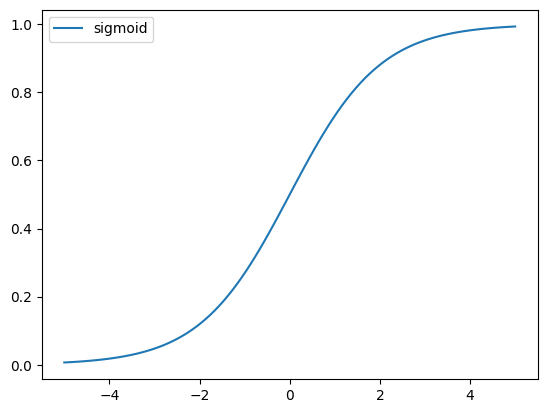

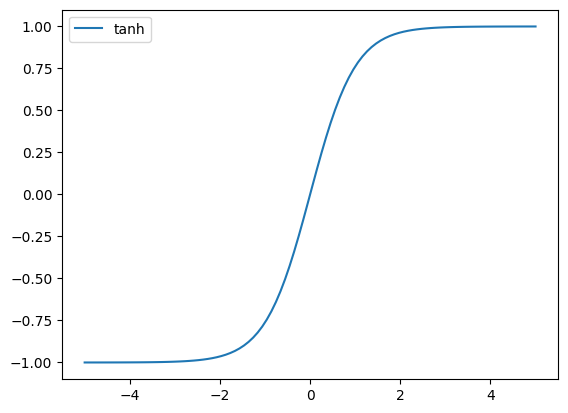

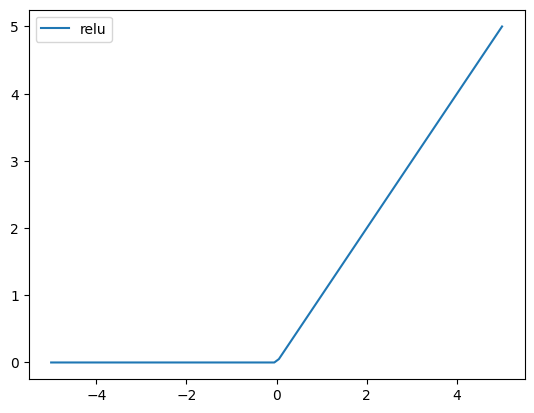

In [13]:

import matplotlib.pyplot as plt
import numpy as np



def plot_activation_function(func, x_range=(-5, 5)):
    x = torch.linspace(*x_range, 100)
    #========== YOUR CODE STARTS HERE ==========
    # compute the activation function output
    y = func(x)
    
    #========== YOUR CODE ENDS HERE ===========
    plt.plot(x.numpy(), y.numpy(), label=func.__name__)
    plt.legend()
    plt.show()
    
#========== YOUR CODE STARTS HERE ==========

# Sigmoid
plot_activation_function(torch.sigmoid)

# Tanh
plot_activation_function(torch.tanh)

# ReLU
plot_activation_function(torch.nn.functional.relu)

#========== YOUR CODE ENDS HERE ===========


## Section 5: Dropout Regularization


### Q5: Dropout Regularization
Implement dropout in a neural network to reduce overfitting.


In [14]:

#========== YOUR CODE STARTS HERE ==========

class DropoutNeuralNetwork(nn.Module):
    def __init__(self):
        super(DropoutNeuralNetwork, self).__init__()
        # Define layers with dropout
        self.fc1 = nn.Linear(784, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 10)

        # Activation functions
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.sigmoid(self.fc1(x))
        x = self.dropout1(x)

        x = self.sigmoid(self.fc2(x))
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.softmax(x)
        
        return x

# Instantiate dropout model
model_dropout = DropoutNeuralNetwork()

#========== YOUR CODE ENDS HERE ===========
print(model_dropout)

DropoutNeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)


## Section 6: Momentum-based Gradient Descent


### Q6: Momentum-based Optimization
Implement the momentum version of gradient descent.


In [15]:

#========== YOUR CODE STARTS HERE ==========

def momentum_gradient_descent():
    theta = torch.tensor([1.0], requires_grad=True)
    velocity = torch.tensor([0.0])
    mu = 0.9
    alpha = 0.01
    for i in range(100):
        # Compute loss
        loss = (theta - 3) ** 2
        
        # Compute gradient
        loss.backward()
        
        # Update velocity
        with torch.no_grad():
            velocity = mu * velocity - alpha * theta.grad

            # Update theta
            theta += velocity
        
        # Reset gradient
        theta.grad.zero_()

    print("Optimized Theta with Momentum:", theta.item())

momentum_gradient_descent()

#========== YOUR CODE ENDS HERE ===========


Optimized Theta with Momentum: 2.991543769836426
